In [1]:
import numpy as np
import pandas as pd
import time
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("diabetic_data.csv",sep=',', header=0, error_bad_lines=False, low_memory=False, decimal='.')
#ograniczenie liczby wierszy do co setnego
df = df[df.index % 100 == 0]

In [3]:
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
100,1260312,38688588,Caucasian,Male,[70-80),?,1,11,7,9,...,No,Steady,No,No,No,No,No,No,Yes,NO
200,2655870,716805,Asian,Male,[60-70),?,6,25,7,1,...,No,No,No,No,No,No,No,No,No,NO
300,3120912,108453753,Caucasian,Female,[50-60),?,6,1,7,1,...,No,Steady,No,No,No,No,No,No,Yes,>30
400,3712782,303957,Caucasian,Female,[50-60),?,6,25,7,3,...,No,No,No,No,No,No,No,No,No,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101300,437398826,182630435,Caucasian,Female,[50-60),?,2,1,1,2,...,No,Up,No,No,No,No,No,Ch,Yes,<30
101400,438573830,153620564,?,Female,[70-80),?,2,6,4,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101500,440198300,108376776,Caucasian,Male,[70-80),?,6,1,17,2,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
101600,441502886,33673167,Asian,Male,[60-70),?,2,1,7,2,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [16]:
def string_to_value(column):
    dict = {}
    k = 1
    unique = df[column].unique()
    unique = sorted(set(unique))
    for unique_value in unique:
        if (unique_value == "nan" or unique_value == "NaN" or unique_value == "NULL" or unique_value == "?" ):
            #nadanie skrajnej liczby latwo widocznej do wyznaczania nulli na wykresie
            dict[unique_value] = 0
        else:
            dict[unique_value] = k
            k+=1
    print(dict)
    return dict

In [5]:
def plot_column(df,column):
    if (is_numeric_dtype(df[column]) == True):
        plt.interactive(True)
        df.plot(y=column, use_index=True)
        plt.show(block=True)
    else:
        dict = string_to_value(column)
        df = df.replace({column: dict})
        plt.interactive(True)
        df.plot(y=column, use_index=True)
        plt.show(block=True)

In [6]:
def plot_everything(df):
    i=0
    colnames = df.columns.get_values()
    colnames.tolist()
    for j in colnames:
        column_name = colnames[i]
        plot_column(df,column_name)
        i+=1

C:\Users\Macie\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


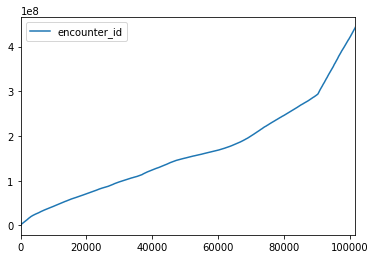

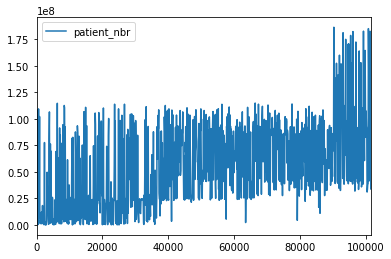

{'?': 0, 'AfricanAmerican': 1, 'Asian': 2, 'Caucasian': 3, 'Hispanic': 4, 'Other': 5}


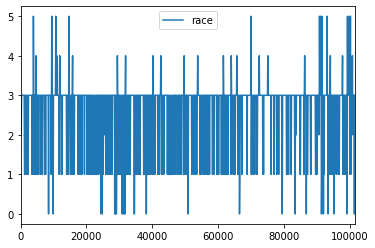

{'Female': 1, 'Male': 2}


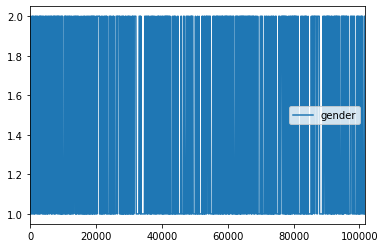

{'[0-10)': 1, '[10-20)': 2, '[20-30)': 3, '[30-40)': 4, '[40-50)': 5, '[50-60)': 6, '[60-70)': 7, '[70-80)': 8, '[80-90)': 9, '[90-100)': 10}


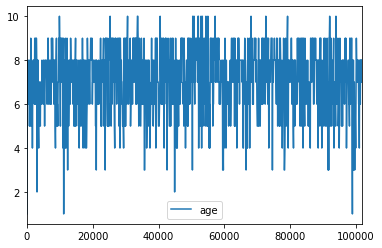

{'?': 0, '[100-125)': 1, '[25-50)': 2, '[50-75)': 3, '[75-100)': 4}


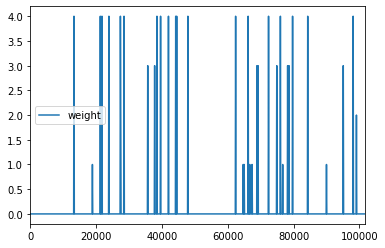

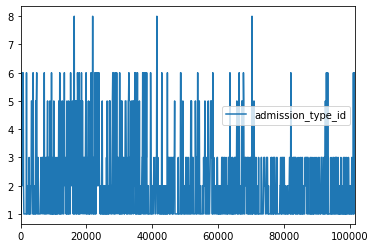

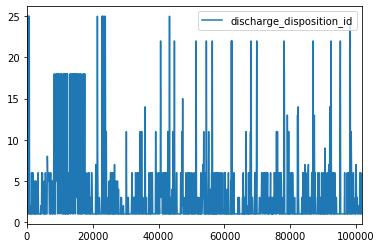

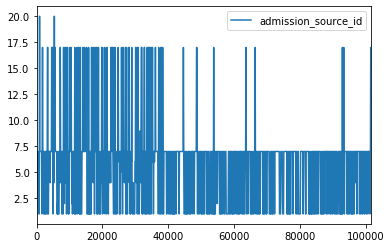

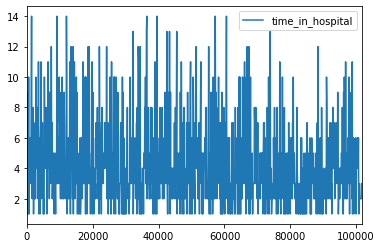

{'?': 0, 'BC': 1, 'CH': 2, 'CM': 3, 'CP': 4, 'DM': 5, 'HM': 6, 'MC': 7, 'MD': 8, 'MP': 9, 'OG': 10, 'PO': 11, 'SP': 12, 'UN': 13}


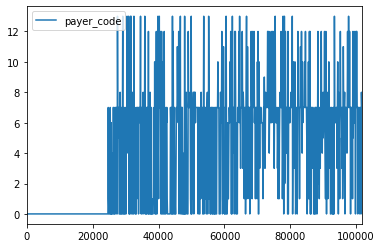

{'?': 0, 'Cardiology': 1, 'Emergency/Trauma': 2, 'Family/GeneralPractice': 3, 'Gastroenterology': 4, 'Gynecology': 5, 'Hematology': 6, 'Hematology/Oncology': 7, 'InternalMedicine': 8, 'Nephrology': 9, 'Neurology': 10, 'ObstetricsandGynecology': 11, 'Oncology': 12, 'Ophthalmology': 13, 'Orthopedics': 14, 'Orthopedics-Reconstructive': 15, 'Otolaryngology': 16, 'Pediatrics': 17, 'Pediatrics-Endocrinology': 18, 'PhysicalMedicineandRehabilitation': 19, 'Psychiatry': 20, 'Psychology': 21, 'Pulmonology': 22, 'Radiologist': 23, 'Radiology': 24, 'Surgeon': 25, 'Surgery-Cardiovascular': 26, 'Surgery-Cardiovascular/Thoracic': 27, 'Surgery-General': 28, 'Surgery-Neuro': 29, 'Surgery-Thoracic': 30, 'Surgery-Vascular': 31, 'Urology': 32}


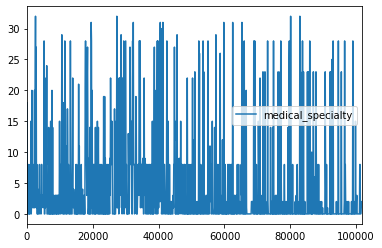

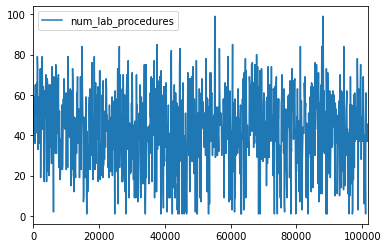

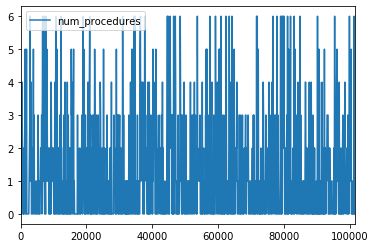

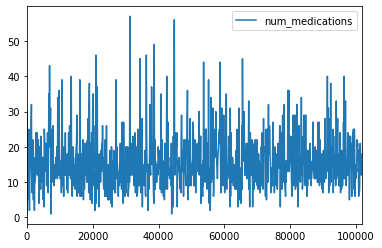

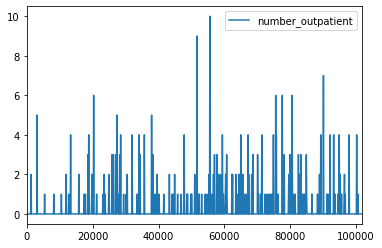

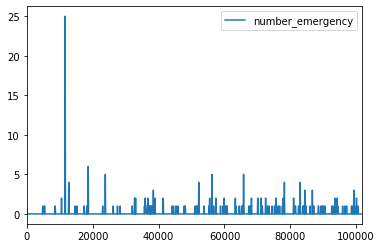

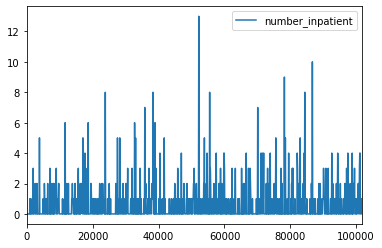

{'112': 1, '150': 2, '153': 3, '155': 4, '156': 5, '162': 6, '171': 7, '182': 8, '188': 9, '189': 10, '197': 11, '198': 12, '199': 13, '202': 14, '203': 15, '211': 16, '218': 17, '226': 18, '227': 19, '236': 20, '238': 21, '239': 22, '241': 23, '250': 24, '250.02': 25, '250.03': 26, '250.1': 27, '250.11': 28, '250.12': 29, '250.13': 30, '250.22': 31, '250.4': 32, '250.42': 33, '250.43': 34, '250.6': 35, '250.7': 36, '250.8': 37, '250.81': 38, '250.82': 39, '250.83': 40, '250.92': 41, '253': 42, '276': 43, '278': 44, '280': 45, '284': 46, '285': 47, '286': 48, '287': 49, '289': 50, '290': 51, '291': 52, '292': 53, '294': 54, '295': 55, '296': 56, '297': 57, '298': 58, '303': 59, '305': 60, '310': 61, '311': 62, '324': 63, '331': 64, '332': 65, '340': 66, '342': 67, '346': 68, '348': 69, '357': 70, '361': 71, '38': 72, '383': 73, '386': 74, '401': 75, '402': 76, '403': 77, '410': 78, '411': 79, '413': 80, '414': 81, '415': 82, '426': 83, '427': 84, '428': 85, '430': 86, '431': 87, '432':

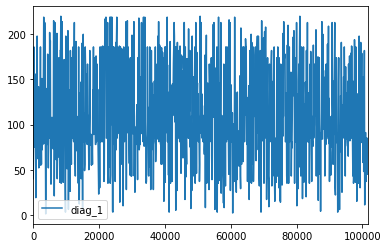

{'153': 1, '154': 2, '162': 3, '196': 4, '197': 5, '198': 6, '203': 7, '211': 8, '218': 9, '235': 10, '242': 11, '250': 12, '250.01': 13, '250.02': 14, '250.03': 15, '250.12': 16, '250.13': 17, '250.4': 18, '250.41': 19, '250.42': 20, '250.5': 21, '250.51': 22, '250.6': 23, '250.8': 24, '250.81': 25, '250.82': 26, '250.83': 27, '250.92': 28, '263': 29, '272': 30, '276': 31, '277': 32, '278': 33, '280': 34, '284': 35, '285': 36, '287': 37, '288': 38, '292': 39, '294': 40, '295': 41, '296': 42, '297': 43, '300': 44, '303': 45, '304': 46, '305': 47, '309': 48, '327': 49, '331': 50, '335': 51, '342': 52, '345': 53, '348': 54, '356': 55, '365': 56, '38': 57, '389': 58, '397': 59, '401': 60, '402': 61, '403': 62, '404': 63, '41': 64, '410': 65, '411': 66, '412': 67, '413': 68, '414': 69, '415': 70, '416': 71, '420': 72, '423': 73, '424': 74, '425': 75, '426': 76, '427': 77, '428': 78, '429': 79, '433': 80, '434': 81, '435': 82, '436': 83, '438': 84, '440': 85, '441': 86, '444': 87, '446': 88

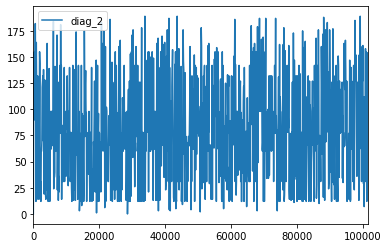

{'110': 1, '112': 2, '153': 3, '155': 4, '162': 5, '185': 6, '197': 7, '198': 8, '202': 9, '203': 10, '211': 11, '220': 12, '242': 13, '244': 14, '250': 15, '250.01': 16, '250.02': 17, '250.1': 18, '250.4': 19, '250.41': 20, '250.43': 21, '250.51': 22, '250.6': 23, '250.7': 24, '250.8': 25, '250.81': 26, '250.82': 27, '250.83': 28, '250.92': 29, '263': 30, '272': 31, '275': 32, '276': 33, '278': 34, '280': 35, '281': 36, '284': 37, '285': 38, '286': 39, '287': 40, '289': 41, '291': 42, '293': 43, '294': 44, '295': 45, '296': 46, '300': 47, '301': 48, '303': 49, '304': 50, '305': 51, '308': 52, '311': 53, '337': 54, '342': 55, '344': 56, '349': 57, '357': 58, '362': 59, '365': 60, '368': 61, '377': 62, '386': 63, '396': 64, '397': 65, '401': 66, '402': 67, '403': 68, '404': 69, '41': 70, '410': 71, '411': 72, '412': 73, '413': 74, '414': 75, '416': 76, '42': 77, '424': 78, '425': 79, '426': 80, '427': 81, '428': 82, '433': 83, '434': 84, '437': 85, '438': 86, '442': 87, '443': 88, '447'

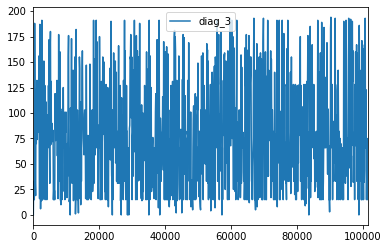

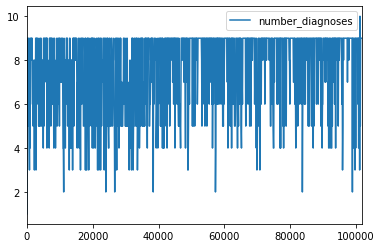

{'>200': 1, '>300': 2, 'None': 3, 'Norm': 4}


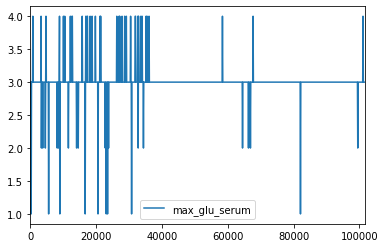

{'>7': 1, '>8': 2, 'None': 3, 'Norm': 4}


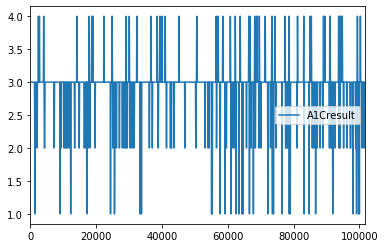

{'Down': 1, 'No': 2, 'Steady': 3, 'Up': 4}


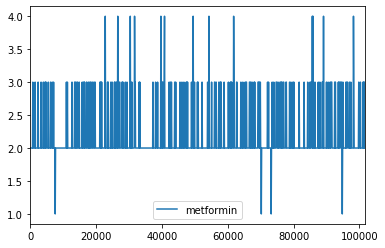

{'No': 1, 'Steady': 2, 'Up': 3}


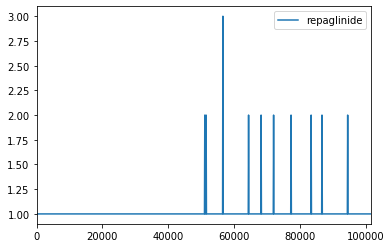

{'No': 1, 'Steady': 2}


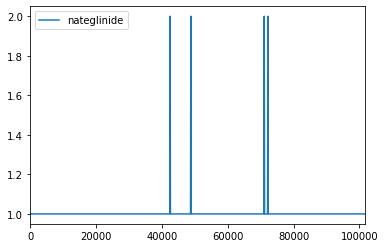

{'No': 1, 'Steady': 2}


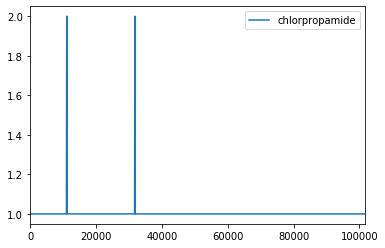

{'No': 1, 'Steady': 2}


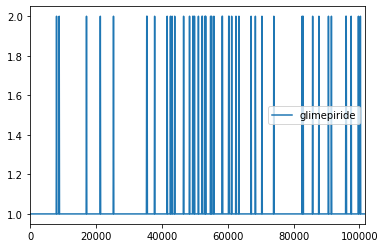

{'No': 1}


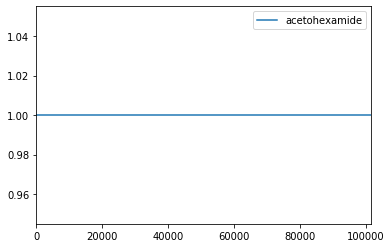

{'Down': 1, 'No': 2, 'Steady': 3, 'Up': 4}


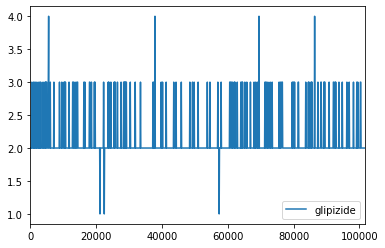

{'Down': 1, 'No': 2, 'Steady': 3, 'Up': 4}


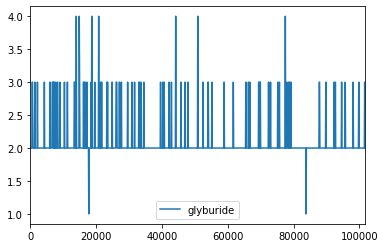

{'No': 1}


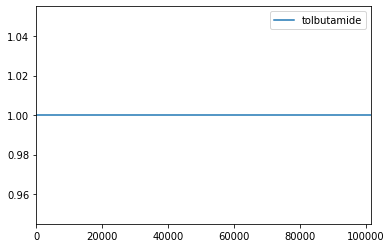

{'Down': 1, 'No': 2, 'Steady': 3, 'Up': 4}


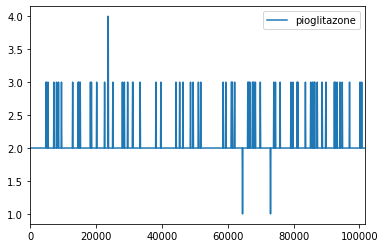

{'No': 1, 'Steady': 2, 'Up': 3}


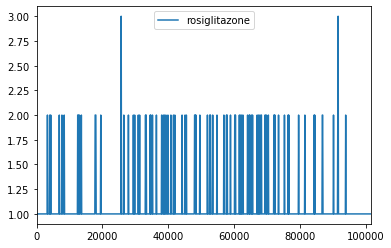

{'No': 1, 'Steady': 2, 'Up': 3}


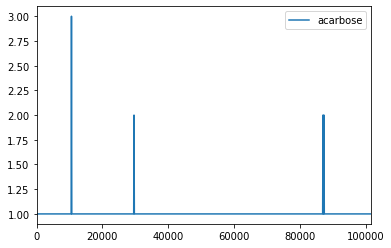

{'No': 1, 'Steady': 2}


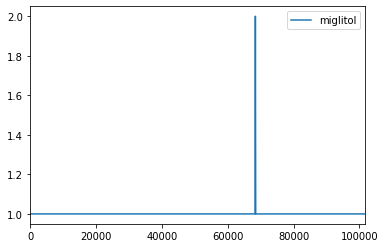

{'No': 1}


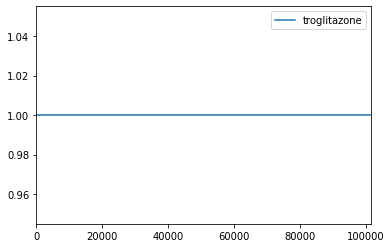

{'No': 1}


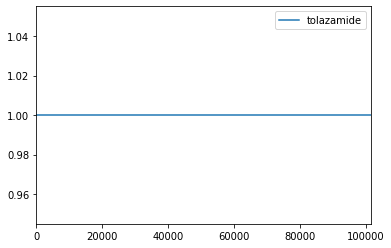

{'No': 1}


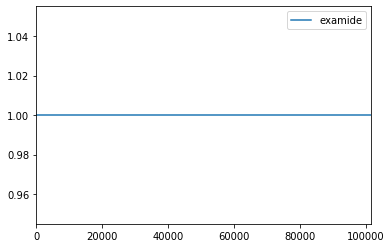

{'No': 1}


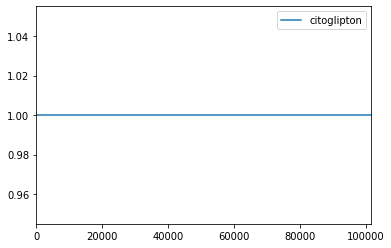

{'Down': 1, 'No': 2, 'Steady': 3, 'Up': 4}


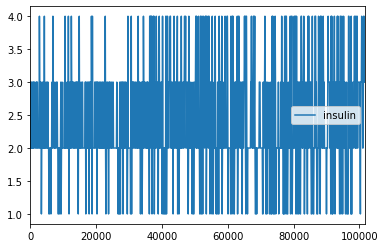

{'No': 1, 'Steady': 2}


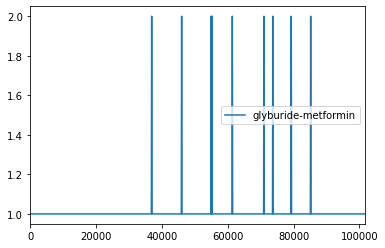

{'No': 1}


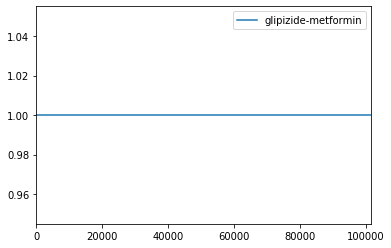

{'No': 1}


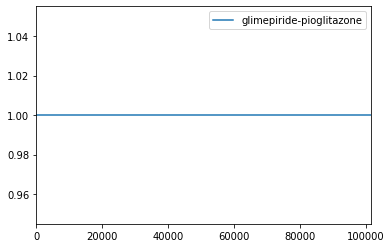

{'No': 1}


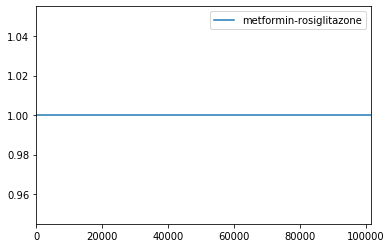

{'No': 1}


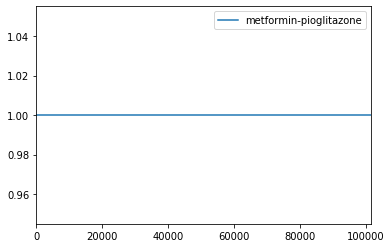

{'Ch': 1, 'No': 2}


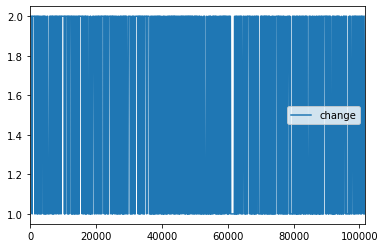

{'No': 1, 'Yes': 2}


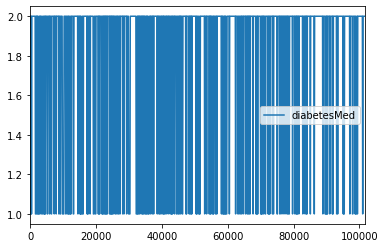

{'<30': 1, '>30': 2, 'NO': 3}


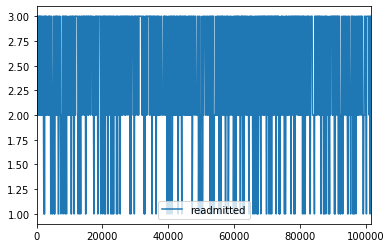

In [17]:
plot_everything(df)

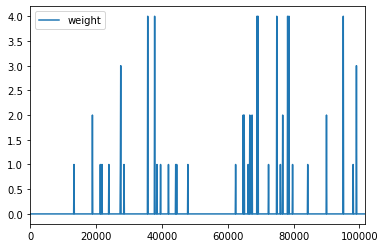

In [8]:
plot_column(df,'weight')

{'Female': 1, 'Male': 2}


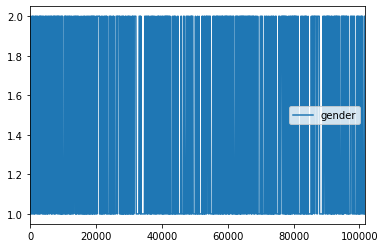

In [14]:
plot_column(df,'gender')